<a href="https://colab.research.google.com/github/czn-py/Deep-Learning-Project/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import essential packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [ ]:
# read csv file
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/MSDA/Text Analysis.csv")
# Display first 10 rows
df.head(10)

Mounted at /content/drive


,text,sentiment
0,plus you've added commercials to the experienc...,1
1,"it's really aggressive to blast obnoxious ""ent...",0
2,and it's a really big bad thing about it,0
3,seriously would pay $30 a flight for seats tha...,0
4,"yes, nearly every time I fly VX this â€œear wo...",1
5,"Well, I didn'tâ€¦but NOW I DO! :-D",1
6,"it was amazing, and arrived an hour early. You...",1
7,I &lt;3 pretty graphics. so much better than m...,1
8,This is such a great deal! Already thinking ab...,1
9,@virginmedia I'm flying your #fabulous #Seduct...,1


from matplotlib import pyplot as plt
_df_0['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Create new objects for each column
raw_docs_train = df['text'].values
sentiment_train = df['sentiment'].values


In [ ]:
# Pre-process for tokennization
raw_docs_train = [str(text) for text in raw_docs_train]

In [ ]:
# Consider only top 12k frequent words, consider 120 words and discard the words
# that exceeds the  length limitation.
vocab_size = 12000
max_length = 120
trunc_type = 'post'

In [ ]:
# Define and apply tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(raw_docs_train)
word_index = tokenizer.word_index
#print(word_index)
print(word_index['but'])

26


In [ ]:

# split the data into train and test parts, then convert them into numpy array

from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(raw_docs_train, sentiment_train,
                                               stratify=sentiment_train,
                                               random_state=42,
                                               test_size=0.1, shuffle=True)
train_xs = np.array(train_xs)
test_xs = np.array(test_xs)

# Check for number of reviews
print(len(train_xs),len(test_xs))

10386 1155


In [ ]:
# Pre-process train & test df for texts-to-sequences
assert train_xs.shape[0] == train_ys.shape[0]
assert test_xs.shape[0] == test_ys.shape[0]
train_xs = [str(text) for text in train_xs]
test_xs = [str(text) for text in test_xs]
print(train_xs[26])

# Convert texts in train and test datasets into sequences of integers
train_xs=tokenizer.texts_to_sequences(train_xs)
test_xs=tokenizer.texts_to_sequences(test_xs)
print(train_xs[26])

t's not something we like to hear. Hopefully our staff can resolve &amp; have you on your way ASAP. ^MLâ€:3:15 &amp; still not resolved
[613, 18, 450, 35, 93, 1, 573, 893, 56, 188, 48, 1050, 51, 21, 9, 8, 16, 123, 814, 7009, 89, 360, 51, 62, 18, 1020]


In [ ]:
# set the seed for numpy & tensorflow
# Pad sequences to make them of equal length as defined earlier (padding added at the end).
np.random.seed(50)
tf.random.set_seed(50)
train_xs = pad_sequences(train_xs,maxlen=max_length,padding='post')
test_xs = pad_sequences(test_xs,maxlen=max_length,padding='post')




This simple RNN model contains the following parameters :
1. Embedding layer: considers all words in the vocabulary and converts them into 10 dense vectors ; length of the input sequences is set equal to the maximum length defined
2. RNN layer contains 50 nodes (units)
3. Dense layer: a fully connected dense layer with 6 units and a `ReLU` activation function.
4. Output layer: a dense layer with 1 node and a `sigmoid` activation function.

In [ ]:
# build the RNN Model
embedding_dim = 10
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(50),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Declare the optimizer, loss function, and evaluation metrics
# Compile model
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
# Training the recurrent neural network model using train dataset and save the result in an object "history"
batch_size = 128
epochs = 5
history = model.fit(train_xs,train_ys,batch_size,epochs,validation_data=(test_xs,test_ys))

Epoch 1/5
82/82 [==============================] - 8s 76ms/step - loss: 0.5292 - accuracy: 0.7712 - val_loss: 0.5072 - val_accuracy: 0.7957
Epoch 2/5
82/82 [==============================] - 4s 47ms/step - loss: 0.5083 - accuracy: 0.7952 - val_loss: 0.5063 - val_accuracy: 0.7957
Epoch 3/5
82/82 [==============================] - 3s 40ms/step - loss: 0.5072 - accuracy: 0.7952 - val_loss: 0.5073 - val_accuracy: 0.7957
Epoch 4/5
82/82 [==============================] - 3s 40ms/step - loss: 0.5072 - accuracy: 0.7952 - val_loss: 0.5065 - val_accuracy: 0.7957
Epoch 5/5
82/82 [==============================] - 5s 60ms/step - loss: 0.5076 - accuracy: 0.7952 - val_loss: 0.5070 - val_accuracy: 0.7957


In [ ]:
# Validating the model with the testing data set:
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

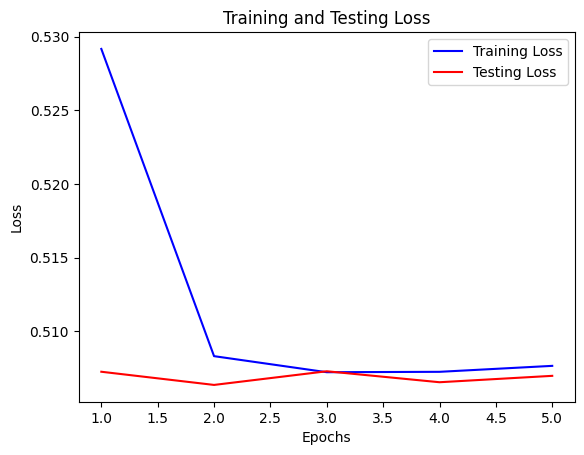

In [ ]:
# plot the loss curves for train and test datasets.
import matplotlib.pyplot as plt
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, testing_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

To address the overfitting problem, we need to stop training the model when the testing loss reaches its minimum. In this case, the optimal number of epochs is 2.0.


Using the model to predict the sentiment class for the following review:

`it was a disappointing experience which will be shared with every business traveler I meet.`


In [ ]:
# Prediction
sentence = ["it was a disappointing experience which will be shared with every business traveler I meet."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(
    sequences,
    maxlen=max_length,
    truncating=trunc_type
)

print(model.predict(padded))

1/1 [==============================] - 0s 292ms/step
[[0.19432099]]


The review is Negative.